# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

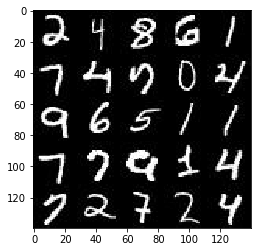

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

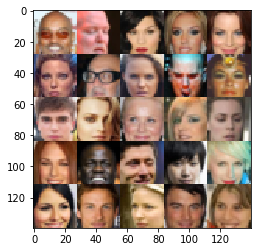

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    input_real = tf.placeholder(dtype=tf.float32,name='input_real',
                                shape=(None,image_width,image_height,image_channels))
    
    input_z = tf.placeholder(dtype=tf.float32,name='input_z',shape=(None,z_dim))
    lr = tf.placeholder(dtype=tf.float32,name='learning_rate')
    return input_real,input_z,lr


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [8]:
def discriminator(images, reuse=False,alpha = 0.2):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    
    with tf.variable_scope('discriminator',reuse=reuse):
        
        conv1 = tf.layers.conv2d(images,64,5,strides=2,padding='same')
        relu1 = tf.maximum(alpha * conv1,conv1)
        
        conv2 = tf.layers.conv2d(relu1,128,5,strides=2,padding = 'same')
        batch_norm2 = tf.layers.batch_normalization(conv2,training=True)
        relu2 = tf.maximum(alpha * batch_norm2,batch_norm2)
        
        
        conv3 = tf.layers.conv2d(relu2,256,5,strides=2,padding = 'same')
        batch_norm3 = tf.layers.batch_normalization(conv3,training=True)
        relu3 = tf.maximum(alpha * batch_norm3,batch_norm3)
        
        flat = tf.reshape(relu3,(-1,4*4*256))
        logits = tf.layers.dense(flat,1)
        out = tf.sigmoid(logits)
        
        return out,logits
        
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variabes in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [19]:
def generator(z, out_channel_dim, is_train=True,alpha = 0.2):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    if is_train is True:
        reuse = False
    else:
        reuse = True
    
    with tf.variable_scope('generator', reuse=reuse):
        x = tf.layers.dense(z,7*7*512)
    
        x = tf.reshape(x,(-1,7,7,512))
        #x = tf.layers.batch_normalization(x,training = is_train)
        x = tf.maximum(alpha*x,x)
    
        x = tf.layers.conv2d_transpose(x,256,5,2,padding='same')
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
    
        x = tf.layers.conv2d_transpose(x,128,5,2,padding='same')
        x = tf.layers.batch_normalization(x,training=is_train)
        x = tf.maximum(alpha * x, x)
        #x = tf.nn.dropout(x,keep_prob=0.5)
        
        logits = tf.layers.conv2d_transpose(x,out_channel_dim,5,1,padding='same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [20]:
def model_loss(input_real, input_z, out_channel_dim,alpha = 0.2):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z,out_channel_dim,is_train=True,alpha=alpha)
    d_model_real,d_logits_real = discriminator(input_real,reuse=False,alpha = alpha )
    d_model_fake,d_logits_fake = discriminator(g_model,reuse=True,alpha = alpha )
    
    smooth = 0.1 
    labels = tf.ones_like(d_model_real) * (1-smooth)
    d_loss_real = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                          labels=labels))
    d_loss_fake = tf.reduce_mean(
                  tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                          labels=tf.zeros_like(d_model_fake)))
    d_loss = d_loss_real + d_loss_fake

    g_loss = tf.reduce_mean(
             tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake,
                                                     labels=tf.ones_like(d_model_fake)))
    
    return d_loss,g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [21]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get the trainable_variables, split into G and D parts
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [23]:
mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
mnist_dataset.shape

(60000, 28, 28, 1)

In [27]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode,alpha = 0.2):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    tf.reset_default_graph()
    
    h ,w, c = data_shape[1],data_shape[2],data_shape[3]
    
    input_real,input_z,lr= model_inputs(h,w,c,z_dim)
    
    d_loss,g_loss=model_loss(input_real,input_z,c,alpha=alpha)
    
    d_opt,g_opt = model_opt(d_loss,g_loss,learning_rate,beta1)
    
    saver = tf.train.Saver()
    samples,losses = [] , []
    steps = 0
    print_num = 10
    show_num = 100
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for e in range(epochs):
            for i,batch_images in enumerate(get_batches(batch_size)):
                steps +=1
                batch_images *= 2.0
                # sample random noise for generator
                batch_z = np.random.uniform(-1,1,size=(batch_size,z_dim))
                
                # Run optimizers
                _ = sess.run(d_opt,feed_dict={input_real:batch_images,input_z:batch_z,lr:learning_rate})
                _ = sess.run(g_opt,feed_dict={input_z:batch_z,input_real:batch_images,lr:learning_rate})
                _ = sess.run(g_opt,feed_dict={input_z:batch_z,input_real:batch_images,lr:learning_rate})
                
                if steps % print_num == 0:
                    train_loss_d = d_loss.eval({input_z:batch_z,input_real:batch_images,lr:learning_rate})
                    train_loss_g = g_loss.eval({input_z:batch_z,lr:learning_rate})
                
                    print("Epoch {}/{}....".format(e+1,epochs),
                      "Discriminator loss: {:.4f}....".format(train_loss_d),
                     "Generator Loss:{:.4f}".format(train_loss_g)
                     )
                if steps % show_num == 0:
                    show_generator_output(sess,25,input_z,c,data_image_mode)
    
        show_generator_output(sess,25,input_z,c,data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2.... Discriminator loss: 2.3758.... Generator Loss:0.1780
Epoch 1/2.... Discriminator loss: 1.8633.... Generator Loss:0.3111
Epoch 1/2.... Discriminator loss: 1.7986.... Generator Loss:0.4388
Epoch 1/2.... Discriminator loss: 1.1741.... Generator Loss:0.8763
Epoch 1/2.... Discriminator loss: 2.3019.... Generator Loss:0.2748
Epoch 1/2.... Discriminator loss: 1.8572.... Generator Loss:0.4437
Epoch 1/2.... Discriminator loss: 1.5482.... Generator Loss:0.6985
Epoch 1/2.... Discriminator loss: 1.6482.... Generator Loss:0.5571
Epoch 1/2.... Discriminator loss: 1.7120.... Generator Loss:0.5627
Epoch 1/2.... Discriminator loss: 1.6210.... Generator Loss:0.7356


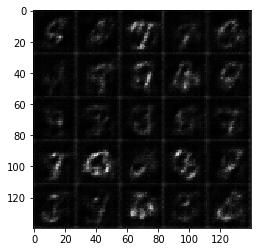

Epoch 1/2.... Discriminator loss: 1.5264.... Generator Loss:1.0409
Epoch 1/2.... Discriminator loss: 1.4476.... Generator Loss:0.6547
Epoch 1/2.... Discriminator loss: 1.4625.... Generator Loss:0.6224
Epoch 1/2.... Discriminator loss: 1.6424.... Generator Loss:1.3273
Epoch 1/2.... Discriminator loss: 1.4228.... Generator Loss:0.7191
Epoch 1/2.... Discriminator loss: 1.3616.... Generator Loss:0.7055
Epoch 1/2.... Discriminator loss: 1.3326.... Generator Loss:0.9212
Epoch 1/2.... Discriminator loss: 1.3195.... Generator Loss:1.0081
Epoch 1/2.... Discriminator loss: 1.2841.... Generator Loss:0.9680
Epoch 1/2.... Discriminator loss: 1.3451.... Generator Loss:0.6780


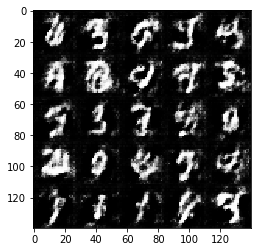

Epoch 1/2.... Discriminator loss: 1.3952.... Generator Loss:0.5356
Epoch 1/2.... Discriminator loss: 1.4205.... Generator Loss:0.5271
Epoch 1/2.... Discriminator loss: 1.3716.... Generator Loss:0.9018
Epoch 1/2.... Discriminator loss: 1.3630.... Generator Loss:0.7203
Epoch 1/2.... Discriminator loss: 1.5592.... Generator Loss:0.4160
Epoch 1/2.... Discriminator loss: 1.3593.... Generator Loss:0.8495
Epoch 1/2.... Discriminator loss: 1.3449.... Generator Loss:0.8157
Epoch 1/2.... Discriminator loss: 1.4022.... Generator Loss:0.9284
Epoch 1/2.... Discriminator loss: 1.4422.... Generator Loss:0.6704
Epoch 1/2.... Discriminator loss: 1.3727.... Generator Loss:0.8360


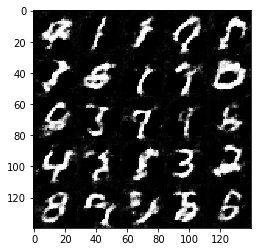

Epoch 1/2.... Discriminator loss: 1.3766.... Generator Loss:1.0526
Epoch 1/2.... Discriminator loss: 1.4161.... Generator Loss:0.7544
Epoch 1/2.... Discriminator loss: 1.4278.... Generator Loss:0.8243
Epoch 1/2.... Discriminator loss: 1.5860.... Generator Loss:0.4149
Epoch 1/2.... Discriminator loss: 1.4866.... Generator Loss:0.6723
Epoch 1/2.... Discriminator loss: 1.3337.... Generator Loss:0.7283
Epoch 1/2.... Discriminator loss: 1.4595.... Generator Loss:0.8943
Epoch 1/2.... Discriminator loss: 1.4041.... Generator Loss:0.6867
Epoch 1/2.... Discriminator loss: 1.4235.... Generator Loss:0.6871
Epoch 1/2.... Discriminator loss: 1.4542.... Generator Loss:0.6569


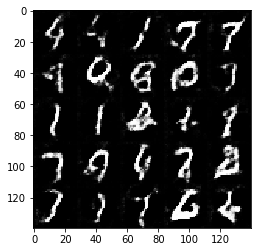

Epoch 1/2.... Discriminator loss: 1.5452.... Generator Loss:0.4724
Epoch 1/2.... Discriminator loss: 1.3824.... Generator Loss:0.6974
Epoch 1/2.... Discriminator loss: 1.4310.... Generator Loss:0.6417
Epoch 1/2.... Discriminator loss: 1.3942.... Generator Loss:0.7609
Epoch 1/2.... Discriminator loss: 1.4236.... Generator Loss:0.6240
Epoch 1/2.... Discriminator loss: 1.4047.... Generator Loss:0.5812
Epoch 2/2.... Discriminator loss: 1.5072.... Generator Loss:1.2735
Epoch 2/2.... Discriminator loss: 1.3437.... Generator Loss:0.7150
Epoch 2/2.... Discriminator loss: 1.4549.... Generator Loss:0.8203
Epoch 2/2.... Discriminator loss: 1.5575.... Generator Loss:0.4441


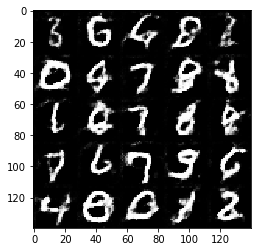

Epoch 2/2.... Discriminator loss: 1.4447.... Generator Loss:0.6452
Epoch 2/2.... Discriminator loss: 1.4023.... Generator Loss:0.7561
Epoch 2/2.... Discriminator loss: 1.4913.... Generator Loss:1.1730
Epoch 2/2.... Discriminator loss: 1.4583.... Generator Loss:0.5861
Epoch 2/2.... Discriminator loss: 1.3830.... Generator Loss:0.8464
Epoch 2/2.... Discriminator loss: 1.3355.... Generator Loss:0.7164
Epoch 2/2.... Discriminator loss: 1.4167.... Generator Loss:0.6975
Epoch 2/2.... Discriminator loss: 1.3362.... Generator Loss:0.8044
Epoch 2/2.... Discriminator loss: 1.3865.... Generator Loss:0.6645
Epoch 2/2.... Discriminator loss: 1.2998.... Generator Loss:0.8234


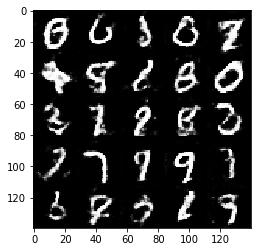

Epoch 2/2.... Discriminator loss: 1.3293.... Generator Loss:0.7376
Epoch 2/2.... Discriminator loss: 1.6255.... Generator Loss:1.5595
Epoch 2/2.... Discriminator loss: 1.3496.... Generator Loss:0.8786
Epoch 2/2.... Discriminator loss: 1.3551.... Generator Loss:0.7435
Epoch 2/2.... Discriminator loss: 1.4093.... Generator Loss:0.6128
Epoch 2/2.... Discriminator loss: 1.4048.... Generator Loss:0.5464
Epoch 2/2.... Discriminator loss: 1.4754.... Generator Loss:0.4736
Epoch 2/2.... Discriminator loss: 1.4614.... Generator Loss:0.7478
Epoch 2/2.... Discriminator loss: 1.3344.... Generator Loss:1.0310
Epoch 2/2.... Discriminator loss: 1.3934.... Generator Loss:1.2392


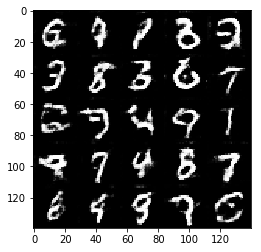

Epoch 2/2.... Discriminator loss: 1.4086.... Generator Loss:0.5978
Epoch 2/2.... Discriminator loss: 1.7278.... Generator Loss:0.3352
Epoch 2/2.... Discriminator loss: 1.4496.... Generator Loss:0.5698
Epoch 2/2.... Discriminator loss: 1.3655.... Generator Loss:0.7711
Epoch 2/2.... Discriminator loss: 1.3714.... Generator Loss:0.9824
Epoch 2/2.... Discriminator loss: 1.3691.... Generator Loss:0.7900
Epoch 2/2.... Discriminator loss: 1.2868.... Generator Loss:0.8596
Epoch 2/2.... Discriminator loss: 1.4688.... Generator Loss:0.6269
Epoch 2/2.... Discriminator loss: 1.3677.... Generator Loss:0.7823
Epoch 2/2.... Discriminator loss: 1.4070.... Generator Loss:0.7143


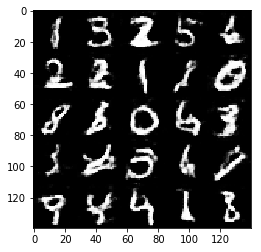

Epoch 2/2.... Discriminator loss: 1.3592.... Generator Loss:0.5655
Epoch 2/2.... Discriminator loss: 1.5827.... Generator Loss:1.1180
Epoch 2/2.... Discriminator loss: 1.3491.... Generator Loss:0.7843
Epoch 2/2.... Discriminator loss: 1.3909.... Generator Loss:0.5853
Epoch 2/2.... Discriminator loss: 1.3359.... Generator Loss:0.7860
Epoch 2/2.... Discriminator loss: 1.5431.... Generator Loss:1.2638
Epoch 2/2.... Discriminator loss: 1.3376.... Generator Loss:0.7319
Epoch 2/2.... Discriminator loss: 1.3480.... Generator Loss:0.7312
Epoch 2/2.... Discriminator loss: 1.3128.... Generator Loss:0.7595
Epoch 2/2.... Discriminator loss: 1.3359.... Generator Loss:0.8385


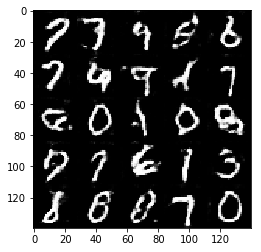

Epoch 2/2.... Discriminator loss: 1.6121.... Generator Loss:1.2497
Epoch 2/2.... Discriminator loss: 1.3431.... Generator Loss:0.7851
Epoch 2/2.... Discriminator loss: 1.5159.... Generator Loss:0.4565


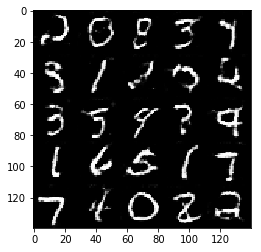

IndexError: list index out of range

In [29]:
batch_size = 128
z_dim = 100
learning_rate =0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))

with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1.... Discriminator loss: 3.7311.... Generator Loss:0.0648
Epoch 1/1.... Discriminator loss: 1.5635.... Generator Loss:0.7111
Epoch 1/1.... Discriminator loss: 1.7569.... Generator Loss:0.6239
Epoch 1/1.... Discriminator loss: 1.5594.... Generator Loss:0.7070
Epoch 1/1.... Discriminator loss: 1.8845.... Generator Loss:0.5003
Epoch 1/1.... Discriminator loss: 1.5635.... Generator Loss:0.8098
Epoch 1/1.... Discriminator loss: 1.6465.... Generator Loss:0.7409
Epoch 1/1.... Discriminator loss: 1.5689.... Generator Loss:0.6847
Epoch 1/1.... Discriminator loss: 1.6751.... Generator Loss:0.6126
Epoch 1/1.... Discriminator loss: 1.6131.... Generator Loss:0.8109


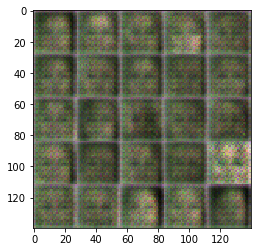

Epoch 1/1.... Discriminator loss: 1.3559.... Generator Loss:0.9286
Epoch 1/1.... Discriminator loss: 1.3193.... Generator Loss:1.2911
Epoch 1/1.... Discriminator loss: 1.1435.... Generator Loss:1.0466
Epoch 1/1.... Discriminator loss: 1.6000.... Generator Loss:0.4578
Epoch 1/1.... Discriminator loss: 1.1629.... Generator Loss:1.0616
Epoch 1/1.... Discriminator loss: 0.8752.... Generator Loss:1.5105
Epoch 1/1.... Discriminator loss: 0.9521.... Generator Loss:1.2196
Epoch 1/1.... Discriminator loss: 1.1468.... Generator Loss:0.7996
Epoch 1/1.... Discriminator loss: 0.9379.... Generator Loss:1.1548
Epoch 1/1.... Discriminator loss: 0.8606.... Generator Loss:1.5795


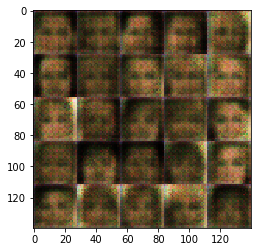

Epoch 1/1.... Discriminator loss: 1.4367.... Generator Loss:0.4997
Epoch 1/1.... Discriminator loss: 0.9970.... Generator Loss:1.1810
Epoch 1/1.... Discriminator loss: 0.7744.... Generator Loss:1.4737
Epoch 1/1.... Discriminator loss: 1.4062.... Generator Loss:0.8581
Epoch 1/1.... Discriminator loss: 0.7593.... Generator Loss:1.8489
Epoch 1/1.... Discriminator loss: 1.1445.... Generator Loss:0.7841
Epoch 1/1.... Discriminator loss: 1.4578.... Generator Loss:1.4641
Epoch 1/1.... Discriminator loss: 0.9270.... Generator Loss:1.2885
Epoch 1/1.... Discriminator loss: 0.8490.... Generator Loss:1.5226
Epoch 1/1.... Discriminator loss: 1.1451.... Generator Loss:2.0211


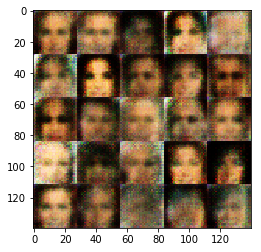

Epoch 1/1.... Discriminator loss: 1.1747.... Generator Loss:1.2390
Epoch 1/1.... Discriminator loss: 1.4176.... Generator Loss:0.7114
Epoch 1/1.... Discriminator loss: 1.6247.... Generator Loss:0.4579
Epoch 1/1.... Discriminator loss: 0.9938.... Generator Loss:1.7146
Epoch 1/1.... Discriminator loss: 1.3091.... Generator Loss:0.6379
Epoch 1/1.... Discriminator loss: 1.1854.... Generator Loss:1.2474
Epoch 1/1.... Discriminator loss: 1.2432.... Generator Loss:1.1105
Epoch 1/1.... Discriminator loss: 1.2122.... Generator Loss:1.2671
Epoch 1/1.... Discriminator loss: 0.9673.... Generator Loss:1.0768
Epoch 1/1.... Discriminator loss: 1.2490.... Generator Loss:1.4921


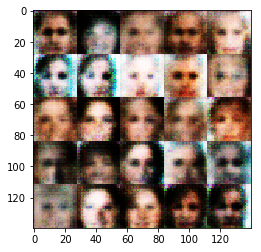

Epoch 1/1.... Discriminator loss: 1.3276.... Generator Loss:0.9044
Epoch 1/1.... Discriminator loss: 1.3289.... Generator Loss:1.1779
Epoch 1/1.... Discriminator loss: 0.9925.... Generator Loss:1.5241
Epoch 1/1.... Discriminator loss: 1.1352.... Generator Loss:1.3076
Epoch 1/1.... Discriminator loss: 1.1833.... Generator Loss:1.2212
Epoch 1/1.... Discriminator loss: 1.5143.... Generator Loss:0.7236
Epoch 1/1.... Discriminator loss: 0.9821.... Generator Loss:1.7273
Epoch 1/1.... Discriminator loss: 0.9509.... Generator Loss:1.2445
Epoch 1/1.... Discriminator loss: 0.7516.... Generator Loss:1.8747
Epoch 1/1.... Discriminator loss: 1.1329.... Generator Loss:1.4769


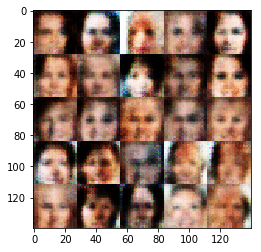

Epoch 1/1.... Discriminator loss: 1.1337.... Generator Loss:0.8622
Epoch 1/1.... Discriminator loss: 1.3010.... Generator Loss:0.7538
Epoch 1/1.... Discriminator loss: 0.9274.... Generator Loss:1.5183
Epoch 1/1.... Discriminator loss: 1.2045.... Generator Loss:0.6553
Epoch 1/1.... Discriminator loss: 1.0577.... Generator Loss:0.9759
Epoch 1/1.... Discriminator loss: 1.7148.... Generator Loss:0.7987
Epoch 1/1.... Discriminator loss: 1.1947.... Generator Loss:0.9722
Epoch 1/1.... Discriminator loss: 1.3522.... Generator Loss:0.9542
Epoch 1/1.... Discriminator loss: 1.2046.... Generator Loss:1.1482
Epoch 1/1.... Discriminator loss: 1.8505.... Generator Loss:1.5546


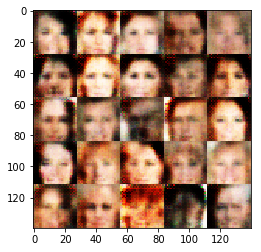

Epoch 1/1.... Discriminator loss: 1.0393.... Generator Loss:1.8414
Epoch 1/1.... Discriminator loss: 1.1272.... Generator Loss:0.7941
Epoch 1/1.... Discriminator loss: 1.3797.... Generator Loss:0.9308
Epoch 1/1.... Discriminator loss: 1.5505.... Generator Loss:0.4391
Epoch 1/1.... Discriminator loss: 0.9756.... Generator Loss:1.3193
Epoch 1/1.... Discriminator loss: 1.0807.... Generator Loss:1.2358
Epoch 1/1.... Discriminator loss: 1.5368.... Generator Loss:0.4899
Epoch 1/1.... Discriminator loss: 0.8711.... Generator Loss:1.6212
Epoch 1/1.... Discriminator loss: 1.5448.... Generator Loss:1.0468
Epoch 1/1.... Discriminator loss: 0.9823.... Generator Loss:1.1480


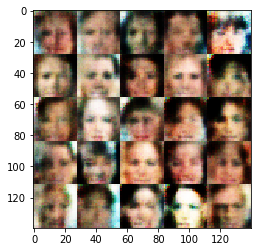

Epoch 1/1.... Discriminator loss: 1.0876.... Generator Loss:1.3931
Epoch 1/1.... Discriminator loss: 1.1928.... Generator Loss:0.7419
Epoch 1/1.... Discriminator loss: 1.3365.... Generator Loss:0.6138
Epoch 1/1.... Discriminator loss: 1.5680.... Generator Loss:0.4945
Epoch 1/1.... Discriminator loss: 1.0519.... Generator Loss:1.2300
Epoch 1/1.... Discriminator loss: 1.3054.... Generator Loss:0.7299
Epoch 1/1.... Discriminator loss: 1.3173.... Generator Loss:0.6254
Epoch 1/1.... Discriminator loss: 1.0118.... Generator Loss:1.2307
Epoch 1/1.... Discriminator loss: 0.8752.... Generator Loss:1.3350
Epoch 1/1.... Discriminator loss: 0.9059.... Generator Loss:1.1861


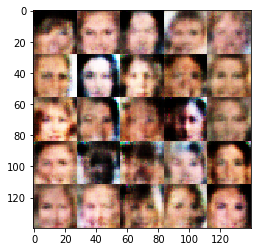

Epoch 1/1.... Discriminator loss: 1.0730.... Generator Loss:1.1458
Epoch 1/1.... Discriminator loss: 1.3591.... Generator Loss:0.7102
Epoch 1/1.... Discriminator loss: 0.9420.... Generator Loss:1.9182
Epoch 1/1.... Discriminator loss: 0.9102.... Generator Loss:1.1365
Epoch 1/1.... Discriminator loss: 1.0857.... Generator Loss:1.0657
Epoch 1/1.... Discriminator loss: 1.6555.... Generator Loss:0.7976
Epoch 1/1.... Discriminator loss: 0.8914.... Generator Loss:1.1873
Epoch 1/1.... Discriminator loss: 1.4868.... Generator Loss:0.4176
Epoch 1/1.... Discriminator loss: 1.4235.... Generator Loss:1.0188
Epoch 1/1.... Discriminator loss: 1.1596.... Generator Loss:0.8053


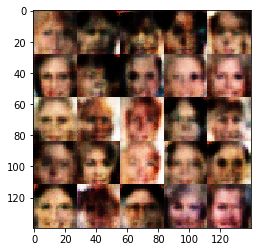

Epoch 1/1.... Discriminator loss: 1.5325.... Generator Loss:0.7875
Epoch 1/1.... Discriminator loss: 0.9980.... Generator Loss:1.2657
Epoch 1/1.... Discriminator loss: 0.8475.... Generator Loss:1.8435
Epoch 1/1.... Discriminator loss: 1.2429.... Generator Loss:0.8573
Epoch 1/1.... Discriminator loss: 1.1263.... Generator Loss:1.7642
Epoch 1/1.... Discriminator loss: 1.1360.... Generator Loss:1.0655
Epoch 1/1.... Discriminator loss: 1.2991.... Generator Loss:0.5967
Epoch 1/1.... Discriminator loss: 1.2398.... Generator Loss:1.1134
Epoch 1/1.... Discriminator loss: 1.1968.... Generator Loss:1.1804
Epoch 1/1.... Discriminator loss: 1.0094.... Generator Loss:1.8063


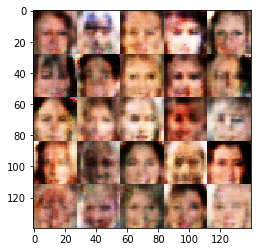

Epoch 1/1.... Discriminator loss: 1.0765.... Generator Loss:1.0253
Epoch 1/1.... Discriminator loss: 1.2408.... Generator Loss:1.2024
Epoch 1/1.... Discriminator loss: 0.8905.... Generator Loss:1.5049
Epoch 1/1.... Discriminator loss: 1.1858.... Generator Loss:1.1779
Epoch 1/1.... Discriminator loss: 1.1683.... Generator Loss:0.9139
Epoch 1/1.... Discriminator loss: 1.0053.... Generator Loss:0.9594
Epoch 1/1.... Discriminator loss: 1.1373.... Generator Loss:0.7335
Epoch 1/1.... Discriminator loss: 1.3354.... Generator Loss:1.6094
Epoch 1/1.... Discriminator loss: 1.2450.... Generator Loss:0.7038
Epoch 1/1.... Discriminator loss: 1.1729.... Generator Loss:1.2817


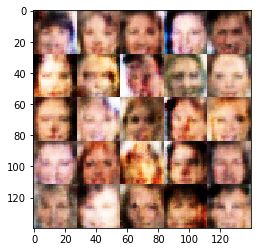

Epoch 1/1.... Discriminator loss: 1.1136.... Generator Loss:0.8365
Epoch 1/1.... Discriminator loss: 1.0545.... Generator Loss:1.3105
Epoch 1/1.... Discriminator loss: 1.1949.... Generator Loss:1.0890
Epoch 1/1.... Discriminator loss: 2.0999.... Generator Loss:1.3994
Epoch 1/1.... Discriminator loss: 1.1130.... Generator Loss:0.9407
Epoch 1/1.... Discriminator loss: 1.2043.... Generator Loss:0.9777
Epoch 1/1.... Discriminator loss: 0.9124.... Generator Loss:1.1400
Epoch 1/1.... Discriminator loss: 1.1545.... Generator Loss:0.7987
Epoch 1/1.... Discriminator loss: 0.9056.... Generator Loss:1.4652
Epoch 1/1.... Discriminator loss: 1.3261.... Generator Loss:1.2011


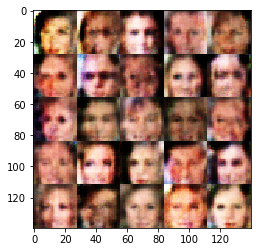

Epoch 1/1.... Discriminator loss: 1.0888.... Generator Loss:1.0272
Epoch 1/1.... Discriminator loss: 0.9705.... Generator Loss:1.5152
Epoch 1/1.... Discriminator loss: 0.7677.... Generator Loss:1.5423
Epoch 1/1.... Discriminator loss: 0.8651.... Generator Loss:1.4928
Epoch 1/1.... Discriminator loss: 0.9461.... Generator Loss:1.6303
Epoch 1/1.... Discriminator loss: 0.8955.... Generator Loss:1.6287
Epoch 1/1.... Discriminator loss: 2.0460.... Generator Loss:0.3144
Epoch 1/1.... Discriminator loss: 1.4594.... Generator Loss:0.8072
Epoch 1/1.... Discriminator loss: 1.5009.... Generator Loss:0.7232
Epoch 1/1.... Discriminator loss: 1.6643.... Generator Loss:0.6885


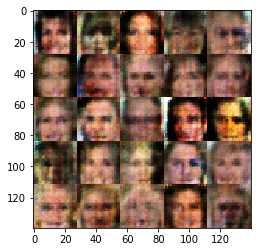

Epoch 1/1.... Discriminator loss: 1.5780.... Generator Loss:0.6738
Epoch 1/1.... Discriminator loss: 1.4924.... Generator Loss:0.7455
Epoch 1/1.... Discriminator loss: 1.5462.... Generator Loss:0.7531
Epoch 1/1.... Discriminator loss: 1.5104.... Generator Loss:0.7205
Epoch 1/1.... Discriminator loss: 1.6050.... Generator Loss:0.6753
Epoch 1/1.... Discriminator loss: 1.4663.... Generator Loss:0.7601
Epoch 1/1.... Discriminator loss: 1.4624.... Generator Loss:0.7763
Epoch 1/1.... Discriminator loss: 1.4100.... Generator Loss:0.8069
Epoch 1/1.... Discriminator loss: 1.5622.... Generator Loss:0.6986
Epoch 1/1.... Discriminator loss: 1.4144.... Generator Loss:0.7704


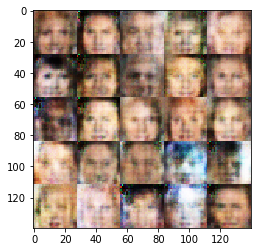

Epoch 1/1.... Discriminator loss: 1.5154.... Generator Loss:0.7686
Epoch 1/1.... Discriminator loss: 1.4617.... Generator Loss:0.7607
Epoch 1/1.... Discriminator loss: 1.4580.... Generator Loss:0.7572
Epoch 1/1.... Discriminator loss: 1.5520.... Generator Loss:0.7118
Epoch 1/1.... Discriminator loss: 1.4315.... Generator Loss:0.7554
Epoch 1/1.... Discriminator loss: 1.4070.... Generator Loss:0.7956
Epoch 1/1.... Discriminator loss: 1.3990.... Generator Loss:0.7898
Epoch 1/1.... Discriminator loss: 1.4746.... Generator Loss:0.7386
Epoch 1/1.... Discriminator loss: 1.4169.... Generator Loss:0.7637
Epoch 1/1.... Discriminator loss: 1.4567.... Generator Loss:0.7694


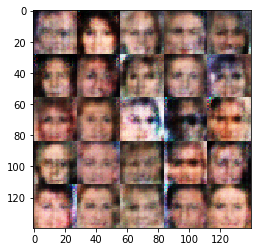

Epoch 1/1.... Discriminator loss: 1.4835.... Generator Loss:0.7470
Epoch 1/1.... Discriminator loss: 1.4155.... Generator Loss:0.7925
Epoch 1/1.... Discriminator loss: 1.4798.... Generator Loss:0.7522
Epoch 1/1.... Discriminator loss: 1.4106.... Generator Loss:0.8073
Epoch 1/1.... Discriminator loss: 1.4117.... Generator Loss:0.7702
Epoch 1/1.... Discriminator loss: 1.4224.... Generator Loss:0.7543
Epoch 1/1.... Discriminator loss: 1.4363.... Generator Loss:0.7717
Epoch 1/1.... Discriminator loss: 1.3896.... Generator Loss:0.7905


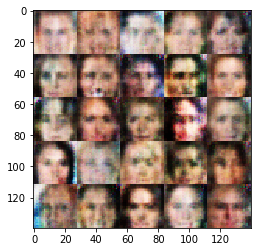

IndexError: list index out of range

In [56]:
batch_size = 128
z_dim = 100
learning_rate = 0.0002
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.